# Import Library

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [44]:
df_customer = pd.read_csv('Customer.csv', sep= ';')
df_product = pd.read_csv('Product.csv', sep= ';')
df_store = pd.read_csv('Store.csv', sep= ';')
df_transaction = pd.read_csv('Transaction.csv', sep= ';')

# Data Preparation

In [45]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [46]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [47]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [48]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [49]:
df1 = pd.merge(df_transaction, df_customer, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_store, on = 'StoreID', how = 'inner')
df_merged = pd.merge(df2, df_product, on = 'ProductID', how = 'inner')
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

The columns Price_x and Price_y have the same values in each column, because base on the same data from Product data so one of them can be dropped.

In [51]:
df_merged.drop(columns ='Price_y', inplace = True)

In [52]:
df_merged.isna().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Product Name       0
dtype: int64

In [53]:
df_merged.duplicated().sum()

0

In [56]:
#fill missing values with Unknown
df_merged['Marital Status'].fillna('Unknown', inplace=True)

df_merged.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Product Name      0
dtype: int64

In [57]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  5020 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
dtypes: int64

In [58]:
df_merged.Date

0       01/01/2022
1       17/07/2022
2       26/09/2022
3       08/01/2022
4       10/01/2022
           ...    
5015    14/07/2022
5016    03/09/2022
5017    08/03/2022
5018    07/07/2022
5019    22/05/2022
Name: Date, Length: 5020, dtype: object

### Change Data Type of Irrelevant Data Types

In [59]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Longitude'] = df_merged['Longitude'].apply(lambda x: x.replace(',','.')).astype(float)
df_merged['Latitude'] = df_merged['Latitude'].apply(lambda x: x.replace(',','.')).astype(float)

In [60]:
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [64]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   object        
 12  StoreName       5020 non-null   object        
 13  GroupStore      5020 non-null   object        
 14  Type            5020 non-null   object        
 15  Lati

# Time Series Regression Analysis

In [65]:
df_reg = df_merged.groupby('Date').agg({'Qty':'sum'})
df_reg

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


<Axes: xlabel='Date'>

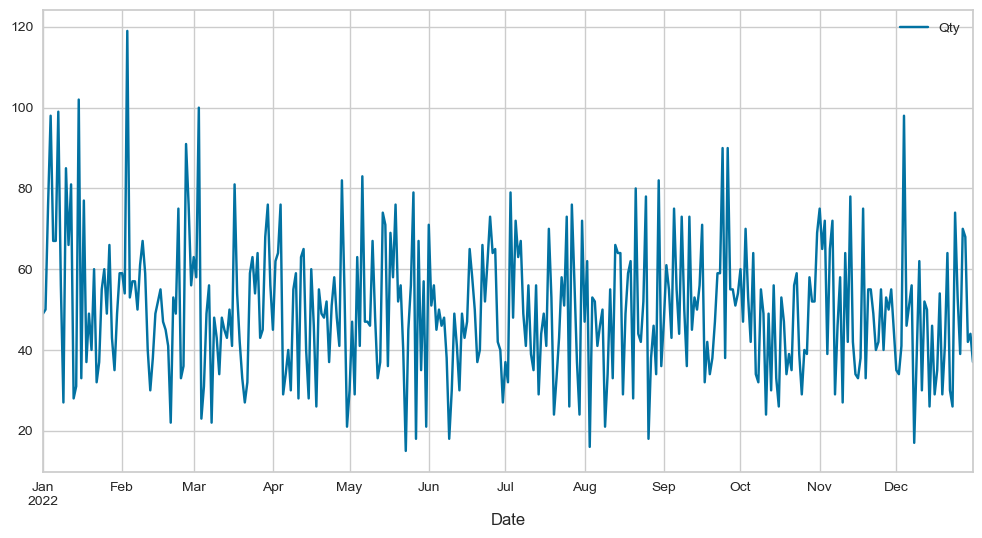

In [66]:
# Visualize Data
df_reg.plot(figsize=(12,6))

In [67]:
#Split Data Train & Data Test
print(df_reg.shape)
test_size = round(df_reg.shape[0] * 0.15)
train=df_reg.iloc[:-1*(test_size)] 
test=df_reg.iloc[-1*(test_size):]
print(train.shape,test.shape)

(365, 1)
(310, 1) (55, 1)


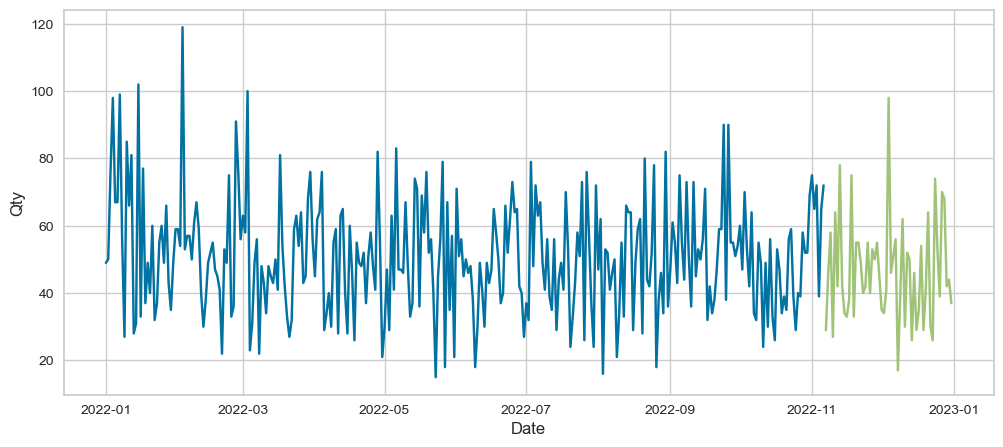

In [68]:
plt.figure(figsize=(12,5))
sns.lineplot(data=train, x=train.index, y=train['Qty'])
sns.lineplot(data=test, x=test.index, y=test['Qty'])
plt.show()

## Data Stationary Check

In [69]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df_reg)

1. ADF :  -19.018782802299725
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


#### P-Value < 0.05 shows that the data is stationary and can be used in time series analysis with ARIMA

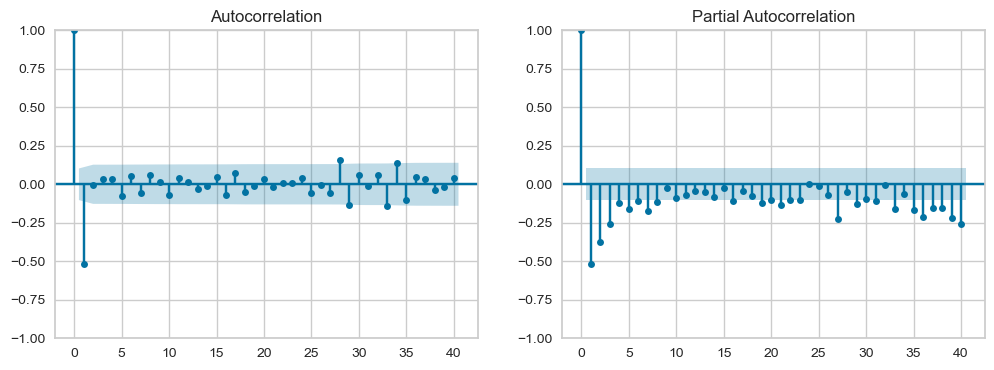

In [70]:
# ACF and PACF plots to determine p and q values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_reg.diff().dropna(), lags=40, ax=ax[0])
plot_pacf(df_reg.diff().dropna(), lags=40, ax=ax[1])
plt.show()

#### The Autocorrelation graph (ACF) shows that the p order is 2 because the first and second lag is significantly out of the significant limit, <br> meanwhile the Partial Autocorrelation graph (PCF) shows that the q order is 3 due to the significant correlation of the first until third lag.

## Modelling

### Auto-fit ARIMA

In [71]:
#auto-fit ARIMA
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Hyperparameter Tuning

In [72]:
from itertools import product
#Make list for p, d, dan q
p = range(0, 4)  # 0-3
d = range(0, 4)  # 0-3
q = range(0, 4)  # 0-3
#Using the product function from itertools to create combinations of p, d, and q.
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]


In [73]:
from statsmodels.tsa.arima.model import ARIMA

aic_scores = []

for param in pdq:
    model = ARIMA(df_reg, order=param)
    model_fit = model.fit()
    aic_scores.append({'par': param, 'aic': model_fit.aic})
    
best_aic = min(aic_scores, key=lambda x: x['aic'])
print(best_aic)

{'par': (0, 1, 1), 'aic': 3090.577045074303}


In [74]:
#Hyperparameter tuning
model_hyper = ARIMA(train, order=best_aic['par'])
model_fit_hyper = model_hyper.fit()

###  Manual Hyperparameter Tuning

In [75]:
#Trial and error tuning 
model_manual = ARIMA(train, order=(40,2,2))
model_fit_manual = model_manual.fit()

### Plot Forecasting

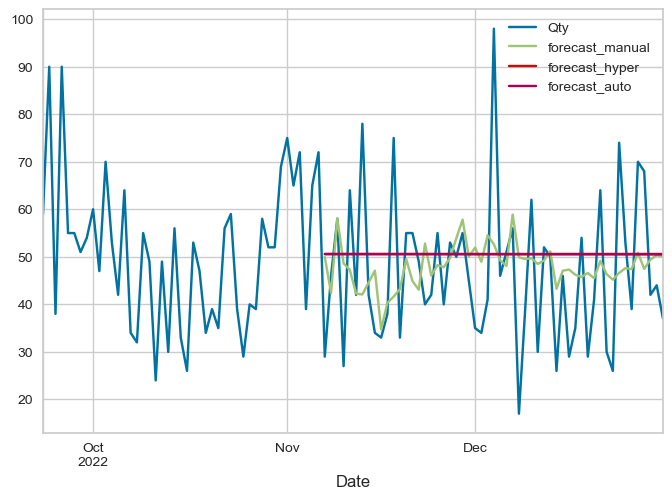

In [76]:
#plot forecasting
forecast_manual = model_fit_manual.forecast(len(test))
forecast_hyper = model_fit_hyper.forecast(len(test))
forecast_auto = auto_arima.predict(len(test))

df_plot = df_reg.iloc[-100:]

df_plot['forecast_manual'] = [None]*(len(df_plot)-len(forecast_manual)) + list(forecast_manual)
df_plot['forecast_hyper'] = [None]*(len(df_plot)-len(forecast_hyper)) + list(forecast_hyper)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot()
plt.show()

### Metrics Evaluation

In [77]:
#Manual parameter tuning metrics

mae = mean_absolute_error(test, forecast_manual)
mape = mean_absolute_percentage_error(test, forecast_manual)
rmse = np.sqrt(mean_squared_error(test, forecast_manual))

print(f'mae - manual: {round(mae,4)}')
print(f'mape - manual: {round(mape,4)}')
print(f'rmse - manual: {round(rmse,4)}')

mae - manual: 11.7239
mape - manual: 0.2917
rmse - manual: 15.2568


In [78]:
#Hyperparameter tuning metrics

mae = mean_absolute_error(test, forecast_hyper)
mape = mean_absolute_percentage_error(test, forecast_hyper)
rmse = np.sqrt(mean_squared_error(test, forecast_hyper))

print(f'mae - hyper: {round(mae,4)}')
print(f'mape - hyper: {round(mape,4)}')
print(f'rmse - hyper: {round(rmse,4)}')

mae - hyper: 12.7954
mape - hyper: 0.3346
rmse - hyper: 15.8283


In [79]:
#Auto-fit ARIMA metrics

mae = mean_absolute_error(test, forecast_auto)
mape = mean_absolute_percentage_error(test, forecast_auto)
rmse = np.sqrt(mean_squared_error(test, forecast_auto))

print(f'mae - auto: {round(mae,4)}')
print(f'mape - auto: {round(mape,4)}')
print(f'rmse - auto: {round(rmse,4)}')

mae - auto: 12.7679
mape - auto: 0.3334
rmse - auto: 15.8016


### Manual Hyperparameter Tuning with order (40,2,2) shows the best evaluation metrics.

## Forecast Quantity Sales with The Best Parameter

In [80]:
#Apply model to forecast data
model = ARIMA(df_reg, order=(40, 2, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

In [81]:
df_reg

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [82]:
forecast

2023-01-01    55.500990
2023-01-02    46.128466
2023-01-03    48.190519
2023-01-04    51.436626
2023-01-05    44.279490
2023-01-06    35.718733
2023-01-07    46.271409
2023-01-08    36.689250
2023-01-09    44.674605
2023-01-10    53.109176
2023-01-11    39.216412
2023-01-12    41.436968
2023-01-13    44.810217
2023-01-14    37.333366
2023-01-15    43.425061
2023-01-16    45.393727
2023-01-17    44.393979
2023-01-18    51.934358
2023-01-19    40.556613
2023-01-20    40.703805
2023-01-21    51.921124
2023-01-22    37.456984
2023-01-23    40.450697
2023-01-24    55.729283
2023-01-25    47.500043
2023-01-26    41.865587
2023-01-27    51.280646
2023-01-28    41.104645
2023-01-29    42.439794
2023-01-30    47.640364
2023-01-31    46.101404
Freq: D, Name: predicted_mean, dtype: float64

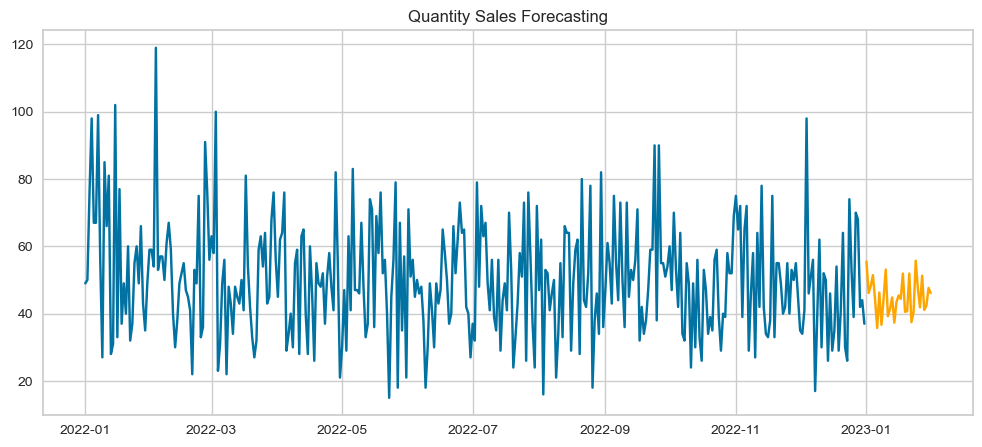

In [83]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_reg)
plt.plot(forecast,color='orange')
plt.title('Quantity Sales Forecasting')
plt.show()

In [84]:
forecast.describe()

count    31.000000
mean     44.990140
std       5.497442
min      35.718733
25%      40.904225
50%      44.674605
75%      47.915441
max      55.729283
Name: predicted_mean, dtype: float64

### From the forecast, the average quantity sales in January 2023 is 44.489815 or up rounded to around 44 pcs/day.

# Clustering 

In [85]:
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [86]:
df_preclust = df_merged.groupby('CustomerID').agg({'TransactionID':'count',
                                                   'Qty':'sum',
                                                   'TotalAmount':'sum'}).reset_index()
df_preclust

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [87]:
df_preclust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   TotalAmount    447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [88]:
df_cluster = df_preclust.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [89]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionID  447 non-null    int64
 1   Qty            447 non-null    int64
 2   TotalAmount    447 non-null    int64
dtypes: int64(3)
memory usage: 10.6 KB


In [90]:
df_cluster.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [91]:
#dataset standardization
X = df_cluster.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_cluster.columns)
df_std.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [92]:
#Normalizing a dataset with MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.77777778, 0.72463768, 0.70394911],
       [0.55555556, 0.68115942, 0.39782666],
       [0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.83333333, 0.84057971, 0.6561092 ],
       [0.44444444, 0.46376812, 0.43890803],
       [0.55555556, 0.46376812, 0.46011132]])

In [93]:
#Normalizing dataset with sklearn preprocessing
X_norm2 = preprocessing.normalize(df_cluster)
X_norm2

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [94]:
X_std

array([[ 1.77981554,  1.49652728,  2.09476796],
       [ 0.54588371,  1.26109285,  0.23926861],
       [ 1.16284962,  1.18261471,  0.67221846],
       ...,
       [ 2.08829849,  2.12435243,  1.80479599],
       [-0.0710822 ,  0.0839207 ,  0.48827502],
       [ 0.54588371,  0.0839207 ,  0.61679446]])

In [95]:
df_std

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347
...,...,...,...
442,1.471333,1.418049,0.984681
443,2.088298,1.653484,1.728488
444,2.088298,2.124352,1.804796
445,-0.071082,0.083921,0.488275


In [96]:
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X_std)
    wcss.append(model1.inertia_)
print(wcss)

[1341.0, 543.2539723846328, 316.96832751208086, 238.55313216419242, 192.16713152981617, 169.8741516887888, 153.94605413916022, 142.9469716083231, 130.0566129181267, 122.92379274303212]


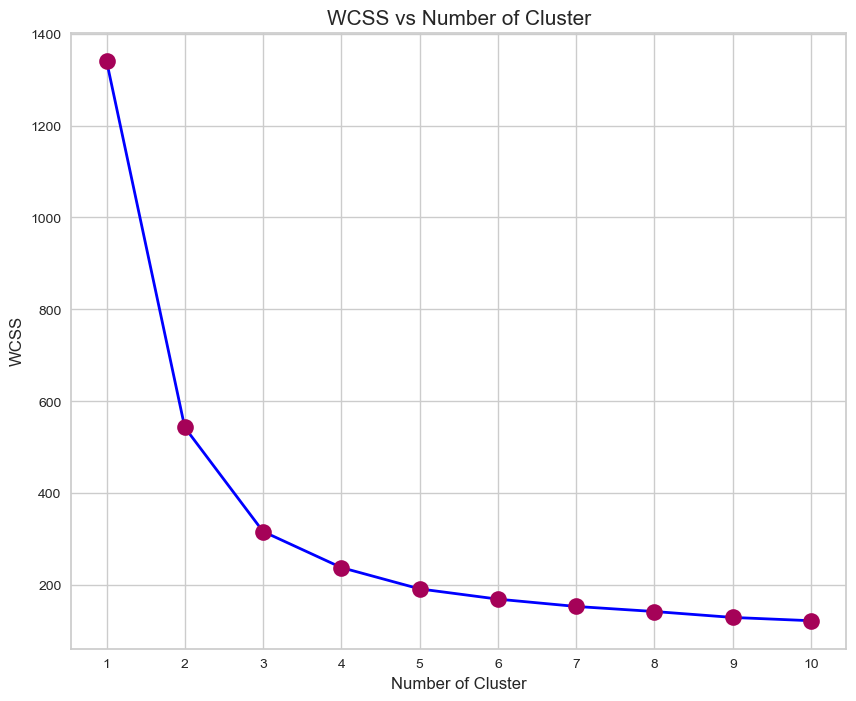

In [97]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm', 
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

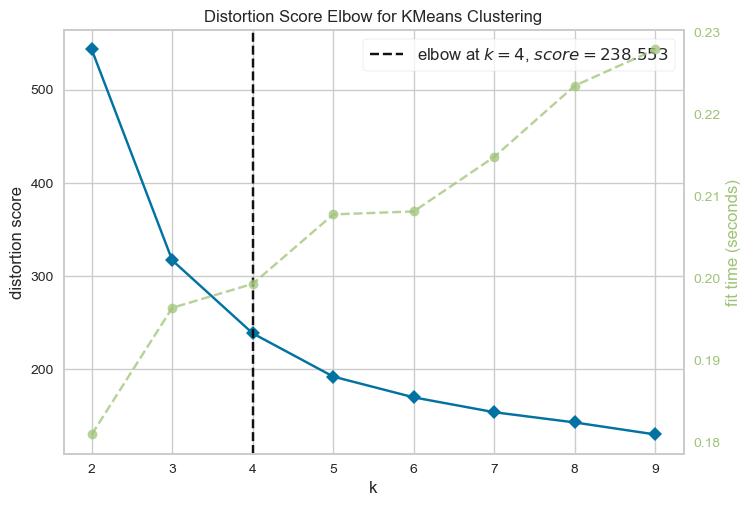

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
#Elbow Method with yellowbrick library
visualizer = KElbowVisualizer(model1, k=(2,10))
visualizer.fit(X_std)
visualizer.show()

In [99]:
K = range(2,8)
fits=[]
score=[]

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init= 'auto').fit(X_std)
    fits.append(model)
    score.append(silhouette_score(X_std, model.labels_, metric='euclidean'))

<Axes: >

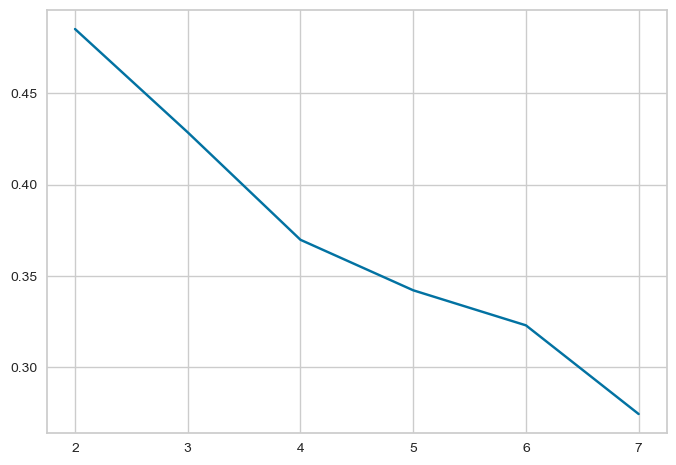

In [100]:
sns.lineplot(x = K, y = score)

The best cluster (k) is found at 4 clusters

In [105]:
# Kmeans n_cluster = 4
#Clustering Kmeans
kmeans_4 = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans_4.fit(X_std)

KMeans(n_clusters=4, n_init=10, random_state=100)

In [106]:
df_cluster['cluster'] = kmeans_4.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster,CustomerID
0,17,60,623300,3,1
1,13,57,392300,1,2
2,15,56,446200,1,3
3,10,46,302500,0,4
4,7,27,268600,2,5


<Figure size 600x600 with 0 Axes>

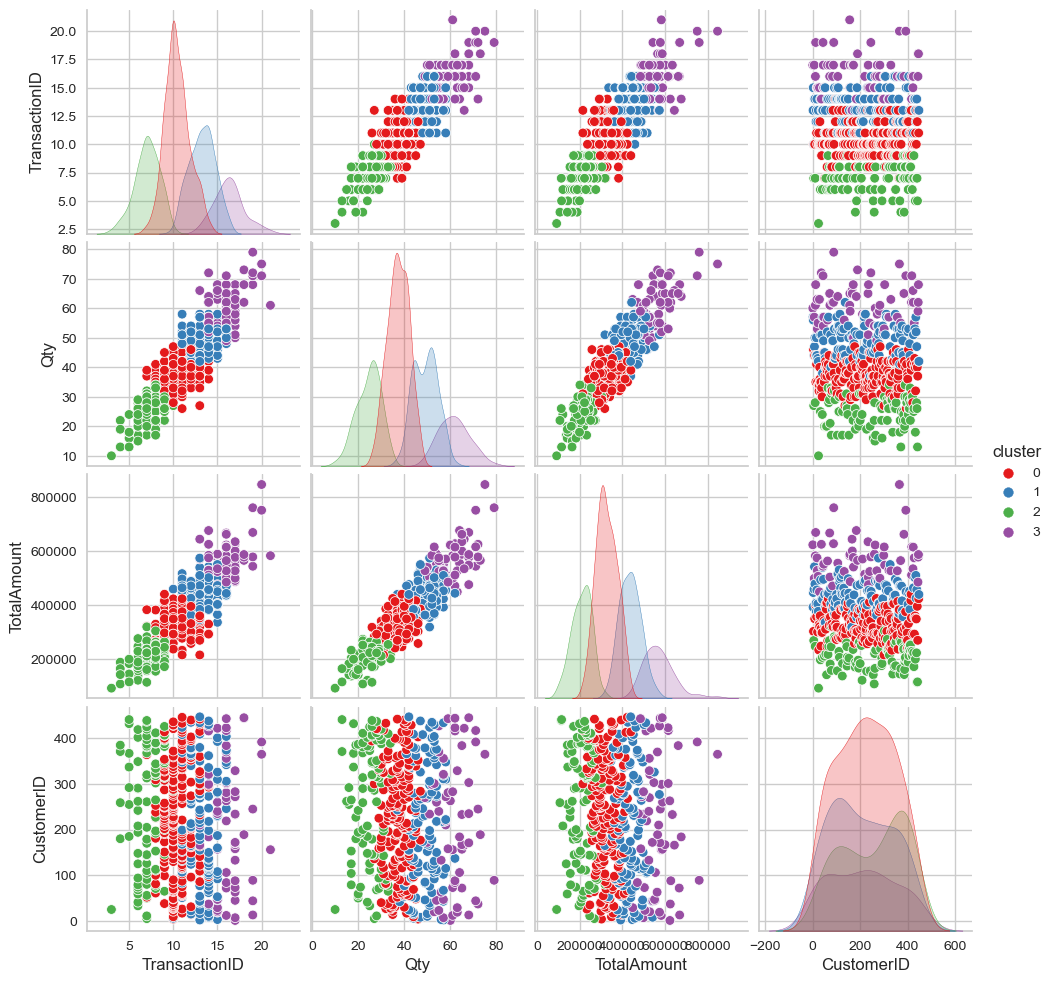

In [107]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [108]:
df_cluster['CustomerID'] = df_preclust['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
0,180,10.427778,37.350000,325663.333333
1,114,13.254386,49.078947,436203.508772
2,93,7.021505,24.505376,208283.870968
3,60,16.316667,61.650000,572100.000000


### Summary
* Cluster 3 <br>
    - The cluster with the highest number of customers.
    - Customer characteristics rank third in every metric (transaction, quantity, total amount).
<br> **Recommendations**:
        - Build good relationships with customers.
        - Conduct surveys to further understand the interests of the majority customers.
* Cluster 2 <br>
    - Customer characteristics ranking second highest in every metric.
<br> **Recommendations**:
        - Offer regular promotions to boost transactions.
        - Implement upselling strategies for high-priced products.
* Cluster 1 <br>
    - Customers with the lowest values in each metric.
<br> **Recommendations**:
        - Offer significant discount prices to increase customer transactions.
        - Provide promotions for transactions with higher quantities.
        - Conduct surveys to explore potential product improvements.
* Cluster 0 <br>
    - The cluster with the lowest number of customers.
    - Customers with the highest values in each metric.
<br> **Recommendations**: 
        - Implement loyalty programs to maintain transactions.
        - Conduct customer satisfaction surveys.
        - Employ upselling strategies for higher-priced products.
